# Lab 8- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#filename="../Lab.5/SUSY.csv"
#filename="../Downloads/data3402/SUSY.csv.gv"
filename="C:/Users/aemsh/Downloads/data3402/SUSY.csv.gz"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


In [3]:
X_Train.shape

(500000, 18)

In [4]:
import tensorflow as tf

C:\Users\aemsh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                228       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 413 (1.61 KB)
Trainable params: 413 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

X = df[FeatureNames]
y = df["signal"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# train
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,  
    batch_size=128,  
    validation_split=0.2 
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plot_metrics_vs_epoch(
    {"accuracy": history.history["accuracy"], "loss": history.history["loss"]},
    {"accuracy": history.history["val_accuracy"], "loss": history.history["val_loss"]},
    "Neural Network",
    metrics=("accuracy", "loss")
)


Epoch 1/20


25000/25000 [==============================] - 62s 2ms/step - loss: 0.4707 - accuracy: 0.7794 - val_loss: 0.4592 - val_accuracy: 0.7862
Epoch 2/20
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4581 - accuracy: 0.7867 - val_loss: 0.4561 - val_accuracy: 0.7875
Epoch 3/20
25000/25000 [==============================] - 57s 2ms/step - loss: 0.4567 - accuracy: 0.7875 - val_loss: 0.4560 - val_accuracy: 0.7879
Epoch 4/20
25000/25000 [==============================] - 56s 2ms/step - loss: 0.4560 - accuracy: 0.7879 - val_loss: 0.4549 - val_accuracy: 0.7882
Epoch 5/20
25000/25000 [==============================] - 56s 2ms/step - loss: 0.4555 - accuracy: 0.7881 - val_loss: 0.4554 - val_accuracy: 0.7883
Epoch 6/20
25000/25000 [==============================] - 56s 2ms/step - loss: 0.4552 - accuracy: 0.7883 - val_loss: 0.4558 - val_accuracy: 0.7879
Epoch 7/20
25000/25000 [==============================] - 57s 2ms/step - loss: 0.4549 - accuracy: 0.7884 - val_loss:

NameError: name 'plot_metrics_vs_epoch' is not defined

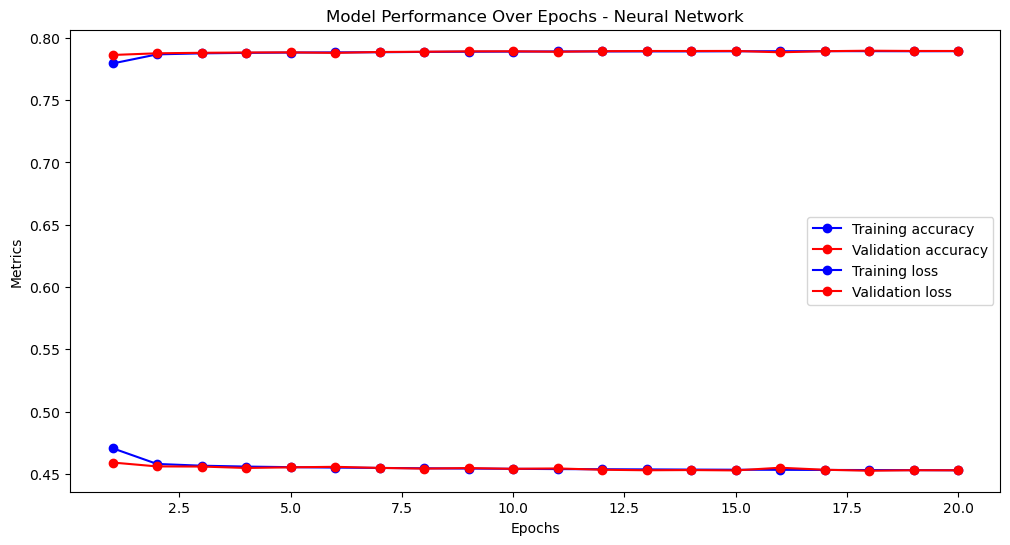

In [8]:
import matplotlib.pyplot as plt

def plot_metrics_vs_epoch(train_history, val_history, model_name, metrics=('loss', 'accuracy')):

    epochs = range(1, len(train_history[metrics[0]]) + 1)

    plt.figure(figsize=(12, 6))

    for metric in metrics:
        plt.plot(epochs, train_history[metric], 'bo-', label=f'Training {metric}')
        plt.plot(epochs, val_history[metric], 'ro-', label=f'Validation {metric}')

    plt.title(f'Model Performance Over Epochs - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

plot_metrics_vs_epoch(
    {"accuracy": history.history["accuracy"], "loss": history.history["loss"]},
    {"accuracy": history.history["val_accuracy"], "loss": history.history["val_loss"]},
    "Neural Network",
    metrics=("accuracy", "loss")
)

## Exercise 2

Following the original paper (see lab 6), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt

X_raw = np.array(df[RawNames])
y_raw = np.array(df["signal"])

X_features = np.array(df[FeatureNames])
y_features = np.array(df["signal"])

X_combined = np.array(df[VarNames[1:]])
y_combined = np.array(df["signal"])

# split
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(
    X_features, y_features, test_size=0.2, random_state=42
)
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

# build and train
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

model_raw = train_model(X_raw_train, y_raw_train)
model_features = train_model(X_features_train, y_features_train)
model_combined = train_model(X_combined_train, y_combined_train)

def evaluate_model(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

fpr_raw, tpr_raw, auc_raw = evaluate_model(model_raw, X_raw_test, y_raw_test)
fpr_features, tpr_features, auc_features = evaluate_model(model_features, X_features_test, y_features_test)
fpr_combined, tpr_combined, auc_combined = evaluate_model(model_combined, X_combined_test, y_combined_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Data (AUC = {auc_raw:.2f})')
plt.plot(fpr_features, tpr_features, label=f'Features Data (AUC = {auc_features:.2f})')
plt.plot(fpr_combined, tpr_combined, label=f'Combined Data (AUC = {auc_combined:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    return fpr, tpr, auc_score

# spli
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(X_features, y_features, test_size=0.2, random_state=42)
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# train
fpr_raw, tpr_raw, auc_raw = train_and_evaluate_model(X_raw_train, y_raw_train, X_raw_test, y_raw_test)
fpr_features, tpr_features, auc_features = train_and_evaluate_model(X_features_train, y_features_train, X_features_test, y_features_test)
fpr_combined, tpr_combined, auc_combined = train_and_evaluate_model(X_combined_train, y_combined_train, X_combined_test, y_combined_test)

print("AUC Raw:", auc_raw)
print("AUC Features:", auc_features)
print("AUC Combined:", auc_combined)


In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

X_raw = np.array(df[RawNames])
y_raw = np.array(df["signal"])

X_features = np.array(df[FeatureNames])
y_features = np.array(df["signal"])

X_combined = np.array(df[VarNames[1:]])
y_combined = np.array(df["signal"])

# split
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(
    X_features, y_features, test_size=0.2, random_state=42
)
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

fpr_raw, tpr_raw, auc_raw = evaluate_model(model_raw, X_raw_test, y_raw_test)
fpr_features, tpr_features, auc_features = evaluate_model(model_features, X_features_test, y_features_test)
fpr_combined, tpr_combined, auc_combined = evaluate_model(model_combined, X_combined_test, y_combined_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Data (AUC = {auc_raw:.2f})')
plt.plot(fpr_features, tpr_features, label=f'Features Data (AUC = {auc_features:.2f})')
plt.plot(fpr_combined, tpr_combined, label=f'Combined Data (AUC = {auc_combined:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

NameError: name 'evaluate_model' is not defined

## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [10]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                228       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 413 (1.61 KB)
Trainable params: 413 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from keras.activations import relu

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8)(x)
x = relu(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_12 (Dense)            (None, 12)                228       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 341 (1.33 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Exercise 4

Repeat exercise 4 from Lab 7, adding your best performing DNN as one of the models.  


In [ ]:
from sklearn.metrics import roc_curve, auc

def compare_classifiers(classifier, X_train, y_train, X_test, y_test, label):
    classifier.fit(X_train, y_train)
    
    train_scores = classifier.decision_function(X_train)
    test_scores = classifier.decision_function(X_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_scores)
    
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', label=f'ROC curve (Train), AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='red', label=f'ROC curve (Test), AUC = {roc_auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {label}')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc_test